# Time-Series Data

A time series is a measurement of one or more variables over a period of time and at a specific interval. Once a time series is captured, analysis is performed to identify patterns in the data, in essence, determining what is happening as time goes by.

pandas provides extensive support for working with time-series data. When working with time-series data you are frequently required to perform a number of tasks such as the following:

* Converting string-based dates and time into objects
* Standardizing date and time values to specific time zones
* Generating sequences of fixed-frequency dates and time intervals
* Efficiently reading/writing the value at a specific time in series
* Converting an existing time series to another with a new frequency of sampling
* Computing relative dates, not only taking into account time zones, but also dealing with specific calendars based upon business days.
* Identifying missing samples in a time series and determunung appropriate substitute values
* Shifting dates and time forward or backward by a given anount
* Calculating aggregate summaries of values as time changes.

#### Setting Up the Notebook

In [ ]:
# import numpy, pandas and datetime
import numpy as np
import pandas as pd
# needed for representing dates and times
import datetime
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)

# matplotlib and inline graphics
import matplotlib.pyplot as plt
%matplotlib inline

## datetime, day and time objects

The datetime object is part of the datetime library and not a part of pandas. This class can be utilized to construct objects representing a fixed point in time at a specific date and time or simply a date without time or time without a date component.

With respect to pandas, the datetime objects do not have the accuracy needed for much of the mathematics involved in extensive calculations on time-series data. However they are commonly used to initialize pandas objects with pandas converting them into pandas timestamp objects behind the scenes.

In [ ]:
# datetime object for Dec 12 2014
datetime(2014,12,15)

datetime.datetime(2014, 12, 15, 0, 0)

In [ ]:
# specific date and also with a time of 5:30 pm
datetime(2014,12,15,17,30)

datetime.datetime(2014, 12, 15, 17, 30)

In [ ]:
# get the local "now" (date and time)
# can take a time zone, but thats not demonstrated here
datetime.now()

datetime.datetime(2017, 11, 12, 7, 3, 11, 989860)

In [ ]:
# a date without time can be represented
# by creating a date using a datetime object
datetime.date(datetime(2014,12,14))

datetime.date(2014, 12, 14)

In [ ]:
# get the current date
datetime.now().date()

datetime.date(2017, 11, 12)

In [ ]:
# get just a time from a datet ime
datetime.time(datetime(2015,12,14,15,17,30))

datetime.time(15, 17, 30)

In [ ]:
# get current local time
datetime.now().time()

datetime.time(7, 5, 31, 889266)

## Timestamp Objects

Specific dates and times in pandas are represented using the pandas.tslib.Timestamp class. Timestamp objects are generally interchangeable with datetime objects.

In [ ]:
# a timestamp representing a specific date
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [ ]:
# a timestamp with both date and time
pd.Timestamp('2014-12-14 17:30')

Timestamp('2014-12-14 17:30:00')

In [ ]:
# timestamp with just a time
# which adds in the current local date
pd.Timestamp('17:55')

Timestamp('2017-11-12 17:55:00')

In [ ]:
# get the current date and time (now)
pd.Timestamp("now")

Timestamp('2017-11-12 07:08:45.544382')

## Timedelta

A difference between two pandas Timestamp objects is represented by a timedelta object, which is a representation of an exact difference in time.

In [ ]:
# what is one day from 2014-11-30?
today = datetime(2014,11,30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [ ]:
# how many days between two dates?
date1 = datetime(2014,12,2)
date2 = datetime(2014,11,28)
date1 - date2

datetime.timedelta(4)

## Introducing Time-series data

Due to its roots in finance, pandas excels in manipulating time-series data. Its abilities have been continuously refined over all of its versions to progressively increase its capabilities for time-series manipulation.

The core of time-series functionality in pandas revolves around the use of specialized indexes that represents measurements of data at one or more timestamps. These indexes in pandas are referred to as DatetimeIndex objects.

### DatetimeIndex

In [ ]:
# create a very simple time-series with two index labels
# and random values
dates = [datetime(2014,8,1),datetime(2014,8,2)]
ts = pd.Series(np.random.randn(2),dates)
ts

2014-08-01    2.80351
2014-08-02    0.18116
dtype: float64

In [ ]:
# what is the type of the index?
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# and we can see it is a collection of timestamps
type(ts.index[0])

pandas._libs.tslib.Timestamp

In [ ]:
# create from just a list of dates as strings!
np.random.seed(123456)
dates = ['2014-08-01','2014-08-02']
ts = pd.Series(np.random.randn(2),dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

In [ ]:
# convert a sequence of objects to a DatetimeIndex
dti = pd.to_datetime(['Aug 1,2014','2014-08-2','2014.8.3',None])
for l in dti: print(l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [ ]:
type('dti')

str

In [ ]:
# pandas fallback to NumPy array of objects if cannot
# parse a value to Timestamp
# this is a list of objects, not timestamps...
# pd.to_datetime(['Aug 1, 2014','foo'])

In [ ]:
# force the conversion, NaT for items that dont work
# pd.to_datetime(['Aug 1, 2014','foo'],coerce=True)

In [ ]:
# create a range of dates starting at a specific date
# and for a specific number of days, creating a Series
np.random.seed(123456)
periods = pd.date_range('8/1/2014',periods=10)
date_series = pd.Series(np.random.randn(10),index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [ ]:
# slice by location
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [ ]:
# a series to demonstrate alignment
s2 = pd.Series([10,100,1000,10000],subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [ ]:
# demonstrate alignment by date on a subset of items
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

In [ ]:
# lookup item by a string representing a date
date_series['2014-08-05']

1.2121120250208506

In [ ]:
# slice between two dates specified by string representing dates
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [ ]:
# a two year range of daily data in a Series
# only select those in 2013
s3 = pd.Series(0,pd.date_range('2013-01-01','2014-12-31'))
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

In [ ]:
# 31 items for May 2014
s3['2014-05']

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, Length: 31, dtype: int64

In [ ]:
# items between two months
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

## Creating time-series data with specific frequencies

In [ ]:
# generate a Series at one minute intervals
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90),pd.date_range('2014-08-01','2014-10-29 23:59',freq='T'))
bymin

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
                         ...   
2014-10-29 23:55:00   -0.563029
2014-10-29 23:56:00    1.180497
2014-10-29 23:57:00    1.850604
2014-10-29 23:58:00   -1.589660
2014-10-29 23:59:00    0.266429
Freq: T, Length: 129600, dtype: float64

In [ ]:
# slice down to the minute
bymin['2014-08-01 00:02':'2014-08-01 00:10']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
2014-08-01 00:08:00   -0.861849
2014-08-01 00:09:00   -2.104569
2014-08-01 00:10:00   -0.494929
Freq: T, dtype: float64

Some of the possible frequency values:

| Alias         | Description                        |
| ------------- |:----------------------------------:|
| B             | Business Day Frequency             |
| C             | Custom Business Day Frequency      |
| D             | Calendar Day Frequency (default    |
| W             | Weekly Frequency                   |
| M             | Month End Frequency                |
| BM            | Business Month End Frequency       |
| CBM           | Custom Business Month End Frequency|
| MS            | Month Start Frequency              |
| BMS           | Business Month Start Frequency     |
| CBMS          | Custom Business Month Start Freq   |
| Q             | Quarter End Frequency              |


In [ ]:
# generate a series based upon business days
days = pd.date_range('2014-08-29','2014-09-05',freq='B')
for d in days: print(d)

2014-08-29 00:00:00
2014-09-01 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00


In this time series, we can see that two days were skipped as they were on the weekend, which would not have occured using a calendar-day  frequency.

A range can be created starting at a particular date and time with a specific frequency and for a specific number of periods using the periods parameter.

In [ ]:
# periods will use the frequency as the increment
pd.date_range('2014-08-01 12:10:01',freq='S',periods=10)

DatetimeIndex(['2014-08-01 12:10:01', '2014-08-01 12:10:02',
               '2014-08-01 12:10:03', '2014-08-01 12:10:04',
               '2014-08-01 12:10:05', '2014-08-01 12:10:06',
               '2014-08-01 12:10:07', '2014-08-01 12:10:08',
               '2014-08-01 12:10:09', '2014-08-01 12:10:10'],
              dtype='datetime64[ns]', freq='S')

### Calculating new dates using offsets

Frequencies in pandas are represented using date offsets. We have touched on this concept at the beginning of the chapter when discussing Timedelta objects. pandas extends the capabilities of these using the concept of DateOffset objects, which represent knowledge of how to integrate time offsets and frequencies relative to DatetimeIndex objects.

##### Date Offsets

The use of DatetimeIndex and DateOffset objects provides the user of pandas great flexibility in calculating a new date/time from another using an offset other than one that represents a fixed period of time.

A practical example would be to calculate the next day of business. This is not simply determined by adding one day to datetime. If a date represents a Friday, the next business day in the US financial marked is not Saturday but Monday. In some cases, one business day from a Friday may actually be Tuesday if Monday is a holiday.

In [ ]:
dti = pd.date_range('2014-08-29','2014-09-05',freq='B')
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# check the frequency is BusinessDay
dti.freq

<BusinessDay>

| Class         | Description                        |
| ------------- |:----------------------------------:|
| DateOffset    | Generic offset - default one cal   |
| BDay          | Business Day     |
| CDay          | Custom Business Day    |
| Week          | one week,optionally anchored a day of the week                   |
| WeekOfMonth   | The x-th day of the y-th week of each month|
              |

pandas takes this strategy of using DateOffset and its specializations to codify logic to calculate the next datetime from another datetime. This makes using these objects very flexible as well as powerful.

* They can be added/subtracted to/from a datetime object to obtain a shifted date
* They can be multiplied by an integer (positive or negative) so that the increment will be applied multiple times
* They have rollforward and rollback methods to move a date forward or backward to the next or previous "offset date"

DateOffset objects can be created by passing them a datetime object that represents a fixed duration of time or using a number of keyword arguments.

In [ ]:
# calculate a one day offset from 2014-8-29
d = datetime(2014,8,29)
do = pd.DateOffset(days = 1)
d + do

Timestamp('2014-08-30 00:00:00')

In [ ]:
# import the data offset types
from pandas.tseries.offsets import *
# calculate one business day from 2014-8-31
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [ ]:
# determine 2 business days from 2014-8-29
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [ ]:
# what is the next business month end
# from a specific date?
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [ ]:
# calculate the next month end by
# rolling forward from a specific date
BMonthEnd().rollforward(datetime(2014,9,15))

Timestamp('2014-09-30 00:00:00')

In [ ]:
# calculate the date of the Tuesday previous
# to a specified date
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

### Anchored offsets

pandas also supports the concept of anchored offsets, which are frequencies that can be specified using a specific suffix. One version of anchored offsets allows you to specify weekly intervals that fall on a specific day of the week.

In [ ]:
# calculate all Wednesdays between 2014-06-01
# and 2014-08-31
wednesdays = pd.date_range('2014-06-01','2014-08-31', freq='W-WED')
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2014-08-06T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-20T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# what are all of the business quarterly end
# dates in 2014?
qends = pd.date_range('2014-01-01','2014-12-31',freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

## Representing durations of time using Period objects
Many useful mathematical operations on time-series data require that events within a specific time interval be analyzed. A simple example would be to determine how many financial transactions occured in a specific period.

This can be performed using Timestamp and DateOffset, where the bounds are calculated and then items filtered based on these bounds. However, this becomes cumbersome when you need to deal with events that must be grouped into multiple periods of time as you start to need to manage sets of the Timestamp and DateOffset objects.

To facilitate these types of data organization and calculations, pandas makes intervals of time a formal construct using the Period class.

pandas also formalizes series of Period objects using Period Index, which provides capabilities of aligning data items based on the indexes associated period objects.

### The Period object
Period is created using a timestamp and a frequency where the timestamp represents the anchor used as a point of reference and the frequency is the duration of time.

In [ ]:
# create a period representing a month of time
# starting in August 2014
aug2014 = pd.Period('2014-08',freq='M')
aug2014

Period('2014-08', 'M')

In [ ]:
# examine the start and end times of this period
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [ ]:
# calculate the period that is one frequency
# unit of aug2014 period further along in time
# This happens to be September 2014
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

The concept of the shift is very important and powerful. The addition of 1 to this Period object informs it to shift in time one positive unit of whatever frequency is represented by the object. In this case, it shifts the period one month forward to September 2014.

In [ ]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

Note that Period has the intelligence to know that September is 30 days and not 31. This is part of the incredible intelligence behind the Period object that saves us a lot of coding.It is not simply adding 30 days but one unit frequency of the period.

### PeriodIndex
A series of Period objects can be combined into a special form of pandas index known as PeriodIndex. A PeriodIndex index is useful for being able to associate data to specific intervals of time and being able to slice and perform analysis on the events in each interval represented in PeriodIndex.

In [ ]:
# create a period index representing
# all monthly boundaries in 2013
mp2013 = pd.period_range('1/1/2013','12/31/2013',freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

In [ ]:
# loop through all period objects in the index
# printing start and end time of each
for p in mp2013:
    print("{0} {1}".format(p.start_time,p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [ ]:
# create a Series with a PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12),mp2013)
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2013-08   -1.044236
2013-09   -0.861849
2013-10   -2.104569
2013-11   -0.494929
2013-12    1.071804
Freq: M, Length: 12, dtype: float64

In [ ]:
# create a Series with a PeriodIndex and which
# represents all calendar month period in 2013 and 2014
np.random.seed(123456)
ps = pd.Series(np.random.randn(24),pd.period_range('1/1/2013','12/31/2014',freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

In [ ]:
# get value for period represented by 2014-06
ps['2014-06']

0.567020349793672

In [ ]:
# get values for all periods in 2014
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 12, dtype: float64

In [ ]:
# all values between (and including) March and June 2014
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

## Handling holidays using calendars
Earlier when we calculated the next business day from August 29,2014 we were told by pandas that this date is September 1,2014. This is actually not correct in the United States: September 1,2014 is a US federal holiday and banks and exchanges are closed on this day. The reason for this is that pandas uses a specific default calendar when calculating the next business day, and this default pandas calendar does not include September 1,2014 as a holiday.

In [ ]:
# demonstrate using the US federal holiday calender
# first need to import it
from pandas.tseries.holiday import *
# create it and show what it considers holidays
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print(d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [ ]:
# create CustomBusinessDay object based on the federal calendar
cbd = CustomBusinessDay(holidays=cal.holidays())
# now calc next business day from 2014-8-29
datetime(2014,8,29) + cbd

Timestamp('2014-09-02 00:00:00')

## Normalizing timestamps using time zones
Time zone management can be one of the most complicated issues to deal with when working with time-series data. Data is ofter collected in different systems across the globe using local time and at some point, it will require coordination with data collected in other time zones.

In [ ]:
# get the current local time and demonstrate there is no
# timezone info by default
now = pd.Timestamp('now')
now, now.tz is None

(Timestamp('2017-11-12 21:14:03.419274'), True)

In [ ]:
# default DatetimeIndex and its Timestamps do not have
# time zone information
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None

(True, True)

In [ ]:
# import common timezones from pytz
from pytz import common_timezones
# report the first 5
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [ ]:
# get now, and now localized to UTC
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2017-11-12 21:16:55.341468'),
 Timestamp('2017-11-12 21:16:55.341468+0000', tz='UTC'))

In [ ]:
# localize a timestamp to US/Mountain time zone
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

In [ ]:
# create a DatetimeIndex using a time zone
rng = pd.date_range('3/6/2012 00:00:00', periods=10,freq="D",tz="US/Mountain")
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [ ]:
# show use of time zone objects
# need to reference pytz
import pytz
# create an object for two different time zones
mountain_tz = pytz.timezone("US/Mountain")
eastern_tz = pytz.timezone("US/Eastern")
# apply each to 'now'
mountain_tz.localize(now),eastern_tz.localize(now)

(Timestamp('2017-11-12 21:16:55.341468-0700', tz='US/Mountain'),
 Timestamp('2017-11-12 21:16:55.341468-0500', tz='US/Eastern'))

In [ ]:
# create two Series, same start, same periods, same frequencies
# each with a different time zone
s_mountain = Series(np.arange(0,5),index=pd.date_range('2014-08-01', periods=5, freq="H",tz="US/Mountain"))
s_eastern = Series(np.arange(0,5),index=pd.date_range('2014-08-01', periods=5, freq="H",tz="US/Eastern"))
s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int64

In [ ]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int64

In [ ]:
# add the two series
# This only results in three items being aligned
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

Once a time zone is assigned to an object, that object can be converted to another time zone using the tz.convert() method.

In [ ]:
# convert s1 from US/Eastern to US/Pacific
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int64

In [ ]:
# this will be the same result as s_eastern + s_mountain
# as the time zones still get aligned to be the same
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

## Manipulating the Timeseries Data

Common operations that are performed on time-series data are realigning data, changing the frequency of the samples and their values and calculating aggregate results on continuously moving subsets of the data to determine the behavior of the values in the data as time changes.

* Shifting and lagging values to calculate percentage changes
* Changing the frequency of the data in the time series
* Up and down sampling of the intervals and values in the time series
* Performing rolling-window calculations

### Shifting and Lagging

A common operation on time-series data is to shift the values backward and forward in time. The pandas method for this is .shift(), which will shift values in Series or DataFrame a specified number of units of the index's frequency.

In [ ]:
# create a series to work with
np.random.seed(123456)
ts = Series([1,2,2.5,1.5,0.5],pd.date_range('2014-08-01',periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [ ]:
# shift forward one day
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

pandas has moved the values forward one unit of the index's frequency, which is one day. The index remains unchanged. There was no replacement data for 2014-08-01 so it is fulled with NaN.

A lag is a shift in a negative direction. The following lags the Series by 2 days:

In [ ]:
# lag two days
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

A common calculation that is performed using a shift is to calculate the percentage daily change in values. This can be performed by dividing a Series object by its values shifted by 1:

In [ ]:
# calculate daily percentage change
ts / ts.shift(1)

2014-08-01         NaN
2014-08-02    2.000000
2014-08-03    1.250000
2014-08-04    0.600000
2014-08-05    0.333333
Freq: D, dtype: float64

Shifts can be performed on different frequencies that that in the index. When this is performed, the index will be modified and the values remain the same. As an example, the following shifts the Series forward by one business day:

In [ ]:
# shift forward one business day
ts.shift(1,freq="B")

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [ ]:
# shift forward by 5 hours
ts.tshift(5,freq="H")

2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

In [ ]:
# shift using a DateOffset
ts.shift(1,DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
Freq: D, dtype: float64

There is an alternative form of shifting provided by the .tshift() method. This method shifts the index labels by the specified units and a frequency specified by the freq paramater (which is required).

In [ ]:
# shift just the index values
ts.tshift(-1,freq="H")

2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

## Frequency Conversion

Frequency data can be converted in pandas using the .asfreq() method of a time-series object, such as Series or DataFrame. When converting frequency, a new Series object with a new DatetimeIndex object will be created. The Datetime Index of the new Series object starts at the first Timestamp of the original and progresses at the given frequency until the last Timestamp of the original. Values will then be aligned into the new Series.

In [ ]:
# create a Series of incremental values
# index by hour through all of August 2014
periods = 31 * 24
hourly = Series(np.arange(0,periods),pd.date_range('08-01-2014',freq="2H",periods=periods))
hourly

2014-08-01 00:00:00      0
2014-08-01 02:00:00      1
2014-08-01 04:00:00      2
2014-08-01 06:00:00      3
2014-08-01 08:00:00      4
                      ... 
2014-10-01 14:00:00    739
2014-10-01 16:00:00    740
2014-10-01 18:00:00    741
2014-10-01 20:00:00    742
2014-10-01 22:00:00    743
Freq: 2H, Length: 744, dtype: int64

In [ ]:
# convert to daily frequency
# many items will be dropped due to alignment
daily = hourly.asfreq('D')
daily

2014-08-01      0
2014-08-02     12
2014-08-03     24
2014-08-04     36
2014-08-05     48
             ... 
2014-09-27    684
2014-09-28    696
2014-09-29    708
2014-09-30    720
2014-10-01    732
Freq: D, Length: 62, dtype: int64

In [ ]:
# convert back to hourly
# results in many NaNs
# as the new index has many labels that do not
# align with the source
daily.asfreq("H")

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-09-30 20:00:00      NaN
2014-09-30 21:00:00      NaN
2014-09-30 22:00:00      NaN
2014-09-30 23:00:00      NaN
2014-10-01 00:00:00    732.0
Freq: H, Length: 1465, dtype: float64

The new index has Timestamp objects at hourly intervals, so only the timestamps at exact days align with the daily time series, resulting in 670 NaN values. This default behavior can be changed using the method parameter of the .asfreq() method. This value can be used for forward fill, reverse fill or to pad the NaN values.

In [ ]:
daily.asfreq('H',method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-09-30 20:00:00    720
2014-09-30 21:00:00    720
2014-09-30 22:00:00    720
2014-09-30 23:00:00    720
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int64

In [ ]:
daily.asfreq('H',method='bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00     12
2014-08-01 02:00:00     12
2014-08-01 03:00:00     12
2014-08-01 04:00:00     12
                      ... 
2014-09-30 20:00:00    732
2014-09-30 21:00:00    732
2014-09-30 22:00:00    732
2014-09-30 23:00:00    732
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int64

## Up and Down resampling
Frequency conversion provides a basic way to convert the index in a time series to another frequency. Data in the new series is aligned with the old data and can result in many NaN values. This can be partially solved using a fill method, but that is limited in capabilities to fill with appropriate information.

Resampling differs in that it does not perform a pure alignment. The values placed in the new series can use the same forward and reverse fill options, but they can also be specified using the other pandas-provided algorithms or with your own functions.

In [ ]:
# calculate a random walk five days long at one second intervals
# these many items will be needed
count = 24 * 60 * 60 * 5
# create a series of values
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)
# calculate the walk
walk = ws.cumsum()
# patch the index
walk.index = pd.date_range('2014-08-01',periods=count,freq="S")
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

Resampling in pandas is accomplished using the .resample() method by passing it a new frequency.To demonstrate this the following resamples our by-the-second data to by-the-minute. This is a down sampling as the result has a lower frequency and results in less values:

In [ ]:
# resample to minute intervals
walkmin = walk.resample("1Min")

A resampling will actually split the data into buckets of data based on new periods and then apply a particular operation to the data in each bucket. The default scenario is to calculate the mean of each bucket. This can be verified with the following, which slices the first minute of data from the walk and calculates its mean:

In [ ]:
# calculate the mean of the first minute of the walk
walk['2014-08-01 00:00'].mean()

-8.718220052832644

In downsampling as the existing data is put into buckets based on the new intervals, there can often be a question of what values are on each end of the bucket. As an example, should the first interval in the previous resampling be from 2014-08-01 00:00:00 through 2014-08-01 23:59:59 or should it end at 2014-08-04 00:00:00 but start at 2014-08-03 23:59:59?

The default is the former and it is referred to as a left close. To other scenario that excludes the left value and includes the right is a right close and can be performed by using the close="right" parameter. 

In [ ]:
# use a right close
walk.resample("1Min", closed="right")

DatetimeIndexResampler [freq=<Minute>, axis=0, closed=right, label=left, convention=start, base=0]

In [ ]:
# take the first value of each bucket
walk.resample("1Min").first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

In [ ]:
# resample to 1 min intervals, then back to 1 sec
bymin = walk.resample("1Min")
bymin.resample('S').mean()

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [ ]:
# resample to 1 sec intervals using forward fill
bymin.resample("S").bfill()

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  


2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [ ]:
# demo interpolating the NaN values
interpolated = bymin.resample("S").interpolate()
interpolated

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  


2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [ ]:
# show ohlc resampling
ohlc = walk.resample("H").ohlc()
ohlc

                           open        high         low       close
2014-08-01 00:00:00    0.469112    0.469112  -67.873166   -2.922520
2014-08-01 01:00:00   -3.374321   23.793007  -56.585154  -55.101543
2014-08-01 02:00:00  -54.276885    5.232441  -87.809456    1.913276
2014-08-01 03:00:00    0.260576   17.124638  -65.820652  -38.530620
2014-08-01 04:00:00  -38.436581    3.537231 -109.805294  -61.014553
...                         ...         ...         ...         ...
2014-08-05 19:00:00  437.652077  550.408942  430.549178  494.471788
2014-08-05 20:00:00  496.539759  510.371745  456.365565  476.505765
2014-08-05 21:00:00  476.025498  506.952877  425.472410  498.547578
2014-08-05 22:00:00  497.941355  506.599652  411.119919  443.925832
2014-08-05 23:00:00  443.017962  489.083657  426.062444  456.191430

[120 rows x 4 columns]

## Time-series moving-window operations
pandas provides a number of functions to compute moving (also known as rolling) statistics. In a rolling window, pandas computes the statistic on a window of data represented by a particular period of time. The window is then rolled along a certain interval, and the statistic is continually calculated on each window as long as the window fits within the dates of the time series.

As a practical example, a rolling mean is commonly used to smooth out short-term fluctuations and highlight longer-term trends in data and is used quite commonly in financial time-series analysis.

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


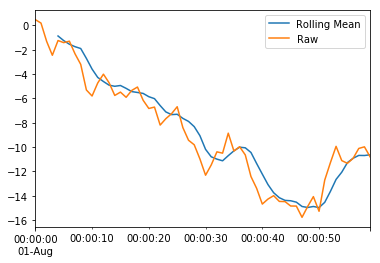

In [ ]:
first_minute = walk['2014-08-01 00:00']
# calculate a rolling mean window of 5 periods
pd.rolling_mean(first_minute,5).plot()
# plot it against the raw data
first_minute.plot()
# add a legend
plt.legend(labels=['Rolling Mean','Raw']);

It can be seen how rolling_mean provides a smoother representation of the underlying data. A larger window will create less variance and smaller windows will create more.

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  """
/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys


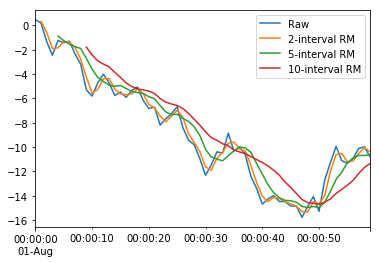

In [ ]:
# demonstrate the difference between 2, 5 and 10 
# interval rolling windows
hlw = walk['2014-08-01 00:00']
hlw.plot()
pd.rolling_mean(hlw,2).plot()
pd.rolling_mean(hlw,5).plot()
pd.rolling_mean(hlw,10).plot()
plt.legend(labels=['Raw','2-interval RM','5-interval RM','10-interval RM']);

Any function can be applied via a rolling window using the pd.rolling_apply function. The supplied function will be passed an array of values in the window and should return a single value, which pandas will aggregate with these results into a time series.

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  This is separate from the ipykernel package so we can avoid doing imports until


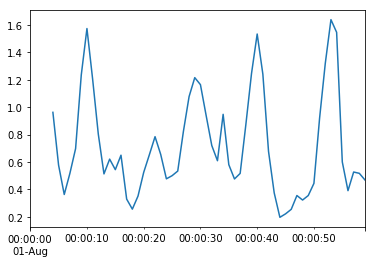

In [ ]:
# calculate mean average deviation with window of 5 intervals
mean_abs_dev = lambda x: np.fabs(x-x.mean()).mean()
pd.rolling_apply(hlw,5,mean_abs_dev).plot();

An expanding window mean can be calculated using a slight variant of the use of the pd.rolling_mean function that repeatedly calculates the mean by always starting with the first value in the time series and for each iteration increases the window size by one. An expanding window mean will be more stable (less responsive) than a rolling window, because as the size of the window increases, the less the impact of the next value will be:

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.expanding_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).mean()
  after removing the cwd from sys.path.


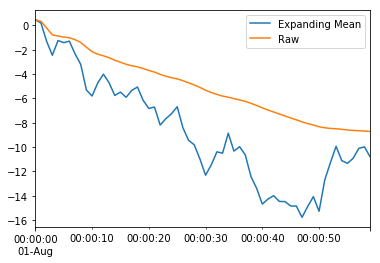

In [ ]:
# calculate an expanding rolling mean
expanding_mean = lambda x: pd.rolling_mean(x,len(x),min_periods=1)
hlw.plot()
pd.expanding_mean(hlw).plot()
plt.legend(labels=['Expanding Mean','Raw']);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30b5f66f-e6a5-4e83-8134-c70f8eed277d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>